
# Project: Investigate a Dataset (TMDb Dataset Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### In my report, I am going to answer the below questions:
1. What movies had the highest and lowest profits?  
2. Which genres are the most common in this dataset? 
3. Which genre had the highest profit?
4. Who is the most frequent actor?
5. Which production companies made the most profit?
6. Which year had the highest number of movie releases?
7. Which year was the most profitable overall for all production companies?
8. What factors affect profit the most?

 

In [87]:
#Importing all needed libraries and setting seaborn style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [88]:
#Loading the dataframe from the csv file
df = pd.read_csv("tmdb-movies.csv")

In [89]:
#Viewing first 5 rows to get a sense of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [90]:
#View data types to see if any data types need to be changed
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [91]:
#Size of the dataframe (rows,clumns)
df.shape

(10866, 21)

In [92]:
#Check if any rows are duplicates
df.duplicated().sum()

1

In [93]:
#Check if any rows have null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [94]:
#Quick descriptive statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning
1. There are some useless columns that need to be removed:
    - imdb_id -> useless for our analysis
    - homepahe-> useless for our analysis
    - budget & revenue -> better to the budget_adj & revenue_adj since those account for inflation
    - tagline -> useless for our analysis
    - overview-> useless for our analysis
    - keywords-> useless for our analysis
2. Release Date is not in date dtype, needs to be converted
3. There is one duplicate row that needs to be deleted
4. There are null values, they have been replaced with "No Data"
5. There are | separators in the director, genres, cast and production companies data.
6. There are zero values in "budget_adj" and "revenue_adj" columns. A new dataframe will be created without these zero values and the new dataframe will be used for any analysis of budgets or revenues or profits.
7. After fixing issue #6, profit column will be created
8. There are zero values in "runtime" column.

In [95]:
#1-Removing unneeded columns
dropped_columns = ['imdb_id','homepage','budget','revenue','tagline','overview','keywords']
df.drop(dropped_columns, axis=1, inplace=True)

In [96]:
#2-Tranforming release date data type to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [97]:
#3-Removing duplicated rows
df.drop_duplicates(inplace=True)

In [98]:
#4-Replacing all null values with "No Data"
df.fillna("No Data",inplace=True)

In [99]:
#Ensuring all datatypes are correct
df.dtypes

id                               int64
popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [100]:
#5-Creating a function that concatenates all strings in a column with a | seprator then
#splits joint strings (a|b into a,b) and creating a Pandas Series for them. The Pandas series is returned.
#This can be used for genres, director, cast and production campanies columns
def splitter(column_name):
    
    x_series = pd.Series(df[column_name].str.cat(sep = '|').split('|'))
    
    return(x_series)

In [101]:
#6-Creating a new dataframe (df_prof) for analyzing profits where any values with revenue_adj or budget_adj are zero are removed
df2= df[(df["revenue_adj"] != 0)].copy() #.copy() prevents an error (A value is trying to be set on a copy of a slice from a DataFrame.)
df_prof= df2[(df2["budget_adj"] != 0)].copy()
df_prof.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [102]:
#7- Creating "profit" column
df_prof["profit"] = df_prof["revenue_adj"] - df_prof["budget_adj"]

Regarding #8, it seems like point #6 removed all zero runtime values.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What movies had the highest and lowest profits?

In [103]:
#Getting the row where profit is maximum
max_profit = df_prof.profit.max()
df_prof[df_prof["profit"] == max_profit]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


In [104]:
#Getting the row where profit is minimum
lowest_profit = df_prof.profit.min()
df_prof.query("profit == {}".format(lowest_profit))

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431.0


It looks like "Star Wars" had the highest profit of around 2.75 billion (2010) dollars. <br>
It also looks like the movie "The Warrior's Way" had a loss of 413.912 million (2010) dollars

### Research Question 2: Which genres are the most common in this dataset?

In [105]:
#Creating a series that has the count of each genre in all movies, in descending order and dropping "No Data"
genre_counts = splitter('genres').value_counts(ascending = False).drop("No Data")

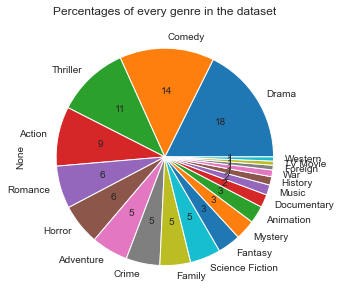

In [106]:
#Drawing pie chart and showing percentages with 0 decimal places
genre_counts.plot(kind="pie", autopct='%.0f', figsize=(5,5), title = "Percentages of every genre in the dataset");

The Three most common genres (highest first) are drama (18%), comedy (14%) and thriller (11%).

### Research Question 3: Which genres had the highest profits?

In [107]:
#Creating an empty dictionary to start filling in the values in the coming for loops
profits_by_genre = {}

#The below for loops are used to fill the dictionary with profits for every genre from df_prof dataframe
for i in range(len(df_prof)): #Looping over every row in the df_prof datafarame
    for genre in genre_counts.index: #Looping over every genre in the genre_counts indeces which are the genres
        if genre in df_prof.iloc[i].loc["genres"]: #If the current genre is present in the "genres" then its profit is added to the dictionary
            profits_by_genre[genre] = profits_by_genre.get(genre, 0) + df_prof.profit.iloc[i]

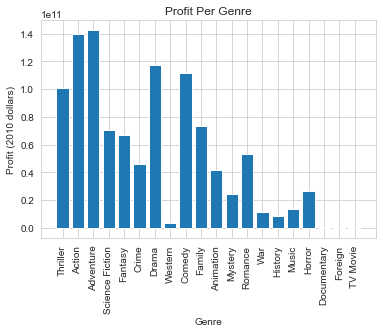

In [108]:
#Drawing a bar chart
plt.bar(range(len(profits_by_genre)), list(profits_by_genre.values()), align='center');
plt.xticks(range(len(profits_by_genre)), list(profits_by_genre.keys()), rotation = 90);
plt.xlabel("Genre");
plt.ylabel("Profit (2010 dollars)");
plt.title("Profit Per Genre");

The genre generating the highest profit is adventure. This is closely followed by action, drama and comedy.

### Research Question 4 : Who is the most frequent actor?

In [109]:
#Calling splitter function on the cast column and getting count of all actors then dropping "No Data"
actors_count = splitter('cast').value_counts(ascending = False).drop("No Data")

In [110]:
#Printing the 3 actors with highest number of movies
print(actors_count[:3])

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
dtype: int64


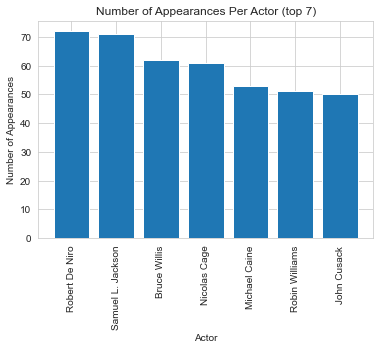

In [111]:
#num is the number of actors we want to see in this analysis
num = 7
plt.bar(range(len(actors_count[:num])),actors_count[:num], align = 'center');
plt.xticks(range(len(actors_count[:num])),actors_count.index[:num], rotation = 90);
plt.xlabel("Actor");
plt.ylabel("Number of Appearances");
plt.title("Number of Appearances Per Actor (top {})".format(num));

The most frequent actor is Robert De Niro with 72 movies, followed by Samuel L. Jackson with 71 movies and Bruce Willis with 62 movies

### Research Question 5: Which production companies made the most profit?

In [112]:
#Creating the series by grouping the dataframe by release year, then summing the profit and sorting in descending order
prod_comp_prof = df_prof.groupby(['production_companies']).sum().profit.sort_values(ascending=False)

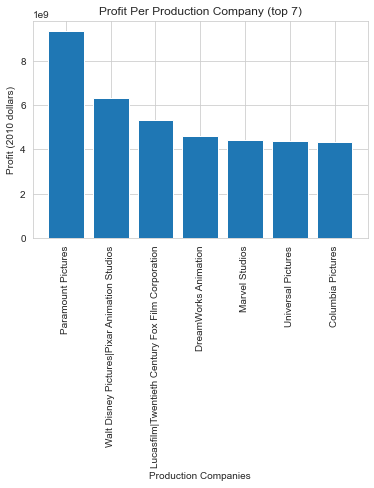

In [113]:
#num is the number of highest profits we want to see
num = 7
plt.bar(range(len(prod_comp_prof[:num])),prod_comp_prof.values[:num], align = 'center');
plt.xticks(range(len(prod_comp_prof[:num])),prod_comp_prof.index[:num], rotation = 90);
plt.xlabel("Production Companies");
plt.ylabel("Profit (2010 dollars)");
plt.title("Profit Per Production Company (top {})".format(num));

The production companies with the most profit are Paramount Pictures, followed by "Walt Disney Pictures with Pixar Animation Studios" and "Lucasfilm with Twentieth Century Fox Film Corporation"

### Research Question 6: Which year had the highest number of movie releases?

In [114]:
#Creating the series by grouping the dataframe by release year, then counting the "id" and sorting in descending order
num_movies_per_year = df.groupby(["release_year"]).count().id.sort_values(ascending=False)

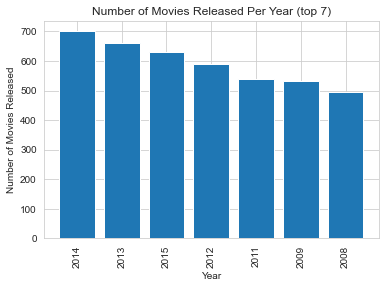

In [115]:
#num is the number of highest years in movie releases that we want to plot
num = 7
plt.bar(range(len(num_movies_per_year[:num])),num_movies_per_year.values[:num], align = 'center');
plt.xticks(range(len(num_movies_per_year[:num])),num_movies_per_year.index[:num], rotation = 90);
plt.xlabel("Year");
plt.ylabel("Number of Movies Released");
plt.title("Number of Movies Released Per Year (top {})".format(num));

The year with the highest number of movie releases is 2014, followed by 2013 and 2015.

### Research Question 7: Which year was the most profitable overall for the industry?

In [116]:
# Creating a series by grouping the dataframe by release year then summing the profits and sorting in descending order
all_profits_per_year = df_prof.groupby("release_year").profit.sum().sort_values(ascending=False)

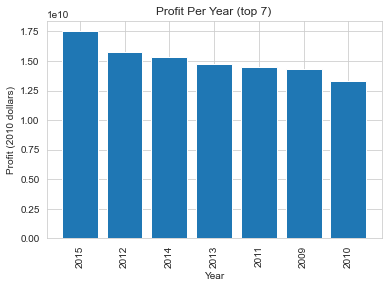

In [117]:
#num is the number of highest years in profit that we want to plot
num = 7
plt.bar(range(len(all_profits_per_year[:num])),all_profits_per_year.values[:num], align = 'center');
plt.xticks(range(len(all_profits_per_year[:num])),all_profits_per_year.index[:num], rotation = 90);
plt.xlabel("Year");
plt.ylabel("Profit (2010 dollars)");
plt.title("Profit Per Year (top {})".format(num));

The year with the highest profit is 2015, followed by 2012 and 2014.

### Research Question 8: What factors affect profit the most?

In [118]:
#A correlation matrix is created first, using df_prof dataframe selecting only the needed columns
corr_matrix = df_prof[["popularity","vote_average","budget_adj","revenue_adj","runtime","release_year", "profit"]].corr(method='pearson')

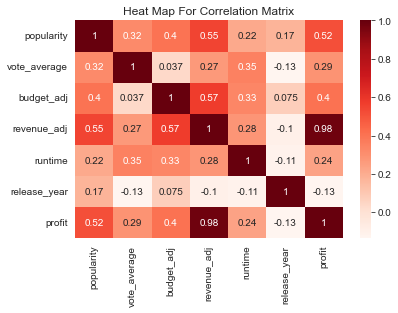

In [119]:
#drawing a Seaborn heatmap is used, with "Reds" colormap name, and annot = true to show the numbers
sns.heatmap(corr_matrix, cmap = "Reds", annot = True);
plt.title("Heat Map For Correlation Matrix");

As shown from the correlations heatmap above, there is a very strong correlation between profit and revenue (r = 0.98). There is also a moderate correlation between profit and popularity (r = 0.52). Other factors have correlation coefficient of 0.4 and lower, meaning the correlation is low or negligible.

<a id='conclusions'></a>
## Conclusions

1. The movie with the highest profit was "Star Wars" while the movie with the lowest profit was "The Warrior's Way".
2. The most common genre in this dataset was drama (18%) followed by comedy (14%) and thriller (11%).
3. The genre generating the most profit is adventure, followed by action, drama and comedy.
4. The most frequent actor is Robert De Niro with 72 movies, followed by Samuel L. Jackson with 71 movies and Bruce Willis with 62 movies.
5. The production companies with the most profit are Paramount Pictures, followed by "Walt Disney Pictures with Pixar Animation Studios" and "Lucasfilm with Twentieth Century Fox Film Corporation".
6. The year with the highest number of movie releases is 2014, followed by 2013 and 2015.
7. The year with the highest profit is 2015, followed by 2012 and 2014.
8. There is a very strong correlation between profit and revenue (r = 0.98). There is also a moderate correlation between profit and popularity (r = 0.52). Other factors have correlation coefficient of 0.4 and lower, meaning the correlation is low or negligible.

## Limitations:

There were incomplete data in this dataset:
- Around 9.5% of production company data is missing
- Also, some revenue data from revenue_adj column is missing as well (showing 0) which accounts for around 55% of the data
- Budget column also had missing information (0), about 52% of the data
- Runtime had only 31 values showing as 0 which is insignificant

The above incomplete data put some limitations in analysis of profits as only 35% of the data had valid numbers.